<a href="https://colab.research.google.com/github/SansBasnet/Python_projects_and_more/blob/master/ISS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.display import Image

In [3]:
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()
    

{'message': 'success',
 'number': 10,
 'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'},
  {'craft': 'ISS', 'name': 'Pyotr Dubrov'},
  {'craft': 'ISS', 'name': 'Anton Shkaplerov'},
  {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'},
  {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'},
  {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'},
  {'craft': 'ISS', 'name': 'Raja Chari'},
  {'craft': 'ISS', 'name': 'Tom Marshburn'},
  {'craft': 'ISS', 'name': 'Kayla Barron'},
  {'craft': 'ISS', 'name': 'Matthias Maurer'}]}

In [4]:
import pandas as pd

# take a lat lon and return a pixel coordinate 
# http://www.satsig.net/lat_long.htm
def translate_geo_to_pixels(longitude, latitude, max_x_px, max_y_px):
    # y = -90 to 90
    # x = -180 to 180
    scale_x = (((longitude + 180) / 360) * max_x_px)
    scale_y = (((latitude - 90) / 180) * max_y_px)
    
    return scale_x, scale_y
    
    
translate_geo_to_pixels(20,90, 500, 250)

(277.77777777777777, 0.0)

In [5]:
# get international space station geo location
# http://open-notify.org/Open-Notify-API/ISS-Location-Now/

def get_space_station_location():
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())


    space_station_longitude = float(space_station_location['iss_position']['longitude'])
    print('space_station_longitude', space_station_longitude)
    space_station_latitude = float(space_station_location['iss_position']['latitude'])
    print('space_station_latitude', space_station_latitude)
    
    return (space_station_longitude, space_station_latitude)

In [6]:
!pip install Basemap

     |████████████████████████████████| 858 kB 5.2 MB/s 
     |████████████████████████████████| 30.5 MB 66.1 MB/s 
     |████████████████████████████████| 6.3 MB 33.5 MB/s 
     |████████████████████████████████| 219 kB 60.7 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=7191edf8920c7dcc996078bb949ef28eeb5da656e8c9cb5decb911cd9098a3c2
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [8]:
get_space_station_location()


space_station_longitude 160.4004
space_station_latitude -51.548


(160.4004, -51.548)

space_station_longitude 160.45
space_station_latitude -51.5499


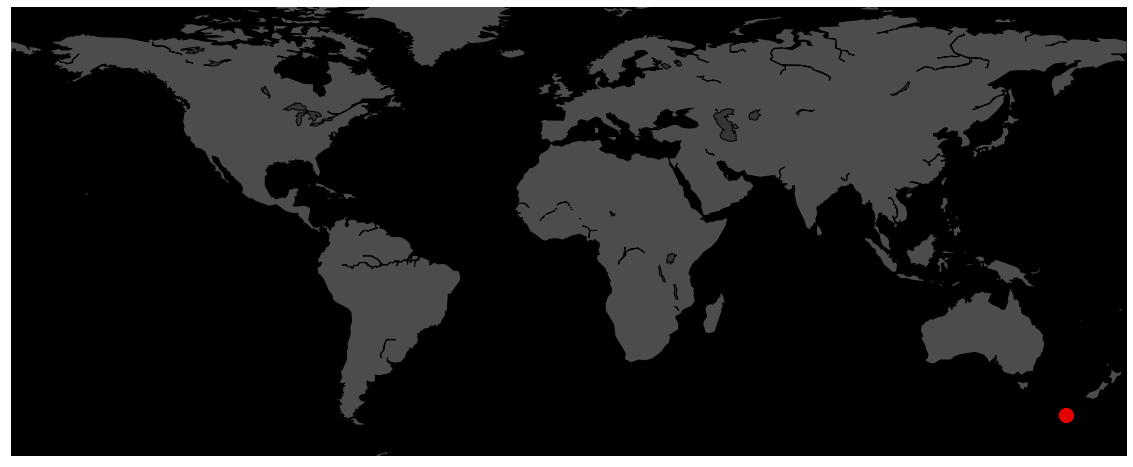

In [9]:
plt.figure(figsize=(20, 14))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='black', linewidth=0)
m.fillcontinents(color='white', alpha=0.3)
m.drawcoastlines(linewidth=1, color="black")

# Add a point per position

space_station_longitude, space_station_latitude = get_space_station_location()
m.scatter(space_station_longitude, space_station_latitude, s=200, alpha=0.9,color='red')


#plt.title('International Space Station Geodesic' , fontsize=20)

In [10]:
# Let's Build
# ISS Icom: https://icons-for-free.com/color-space+station-131994932307187327/
# http://www.satsig.net/lat_long.htm 

In [11]:
print(space_station_longitude, space_station_latitude)


160.45 -51.5499


In [12]:
# figure out translation of space_station_longitude/space_station_latitude to screen pixels
# imagine 0,0 to 300,100
translate_geo_to_pixels(space_station_longitude, space_station_latitude, 300, 100)

(283.7083333333333, -78.63883333333334)

In [13]:
! pip install pytrends

In [14]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

In [15]:
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'message': 'success',
 'number': 10,
 'people': [{'craft': 'ISS', 'name': 'Mark Vande Hei'},
  {'craft': 'ISS', 'name': 'Pyotr Dubrov'},
  {'craft': 'ISS', 'name': 'Anton Shkaplerov'},
  {'craft': 'Shenzhou 13', 'name': 'Zhai Zhigang'},
  {'craft': 'Shenzhou 13', 'name': 'Wang Yaping'},
  {'craft': 'Shenzhou 13', 'name': 'Ye Guangfu'},
  {'craft': 'ISS', 'name': 'Raja Chari'},
  {'craft': 'ISS', 'name': 'Tom Marshburn'},
  {'craft': 'ISS', 'name': 'Kayla Barron'},
  {'craft': 'ISS', 'name': 'Matthias Maurer'}]}

In [16]:
r = requests.get(url='http://api.open-notify.org/iss-now.json')
space_station_location = (r.json())
print(space_station_location)

space_station_location['iss_position']['latitude']
space_station_location['iss_position']['longitude']
space_station_location['timestamp']

{'iss_position': {'longitude': '160.8975', 'latitude': '-51.5657'}, 'timestamp': 1642546234, 'message': 'success'}


1642546234

space_station_longitude 160.9472
space_station_latitude -51.5674


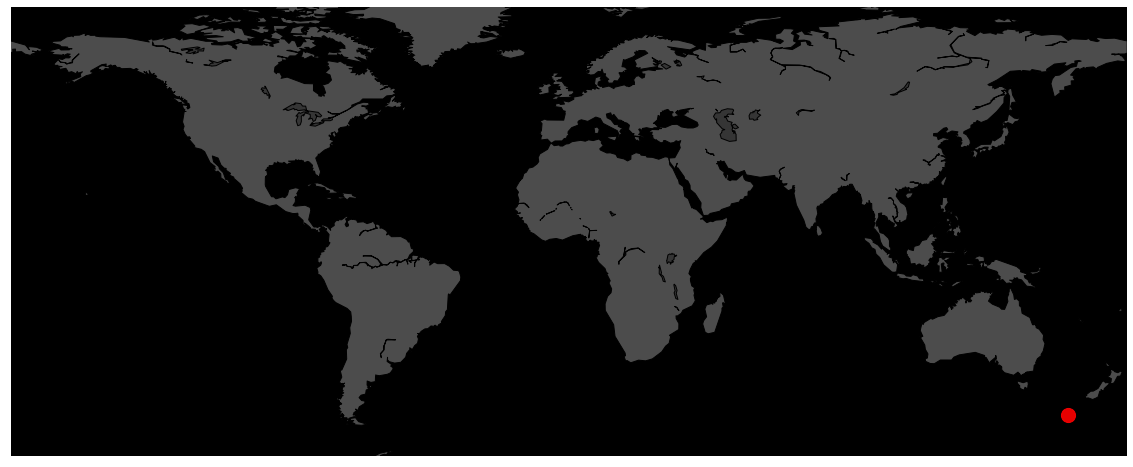

In [17]:
plt.figure(figsize=(20, 14))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='black', linewidth=0)
m.fillcontinents(color='white', alpha=0.3)
m.drawcoastlines(linewidth=1, color="black")

# Add a point per position

space_station_longitude, space_station_latitude = get_space_station_location()
m.scatter(space_station_longitude, space_station_latitude, s=200, alpha=0.9,color='red')

In [18]:
#@title Default title text
record_data = False
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()


    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        # safety break
        if len(space_station_data) > 18000:
            break
            
        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))

In [21]:
record_data = True
if record_data == True:
    import datetime
    date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")

    import time
    starttime=time.time()


    space_station_data = []
    while True: 
        r = requests.get(url='http://api.open-notify.org/iss-now.json')
        space_station_location = (r.json())
        print(space_station_location)

        space_station_data.append([space_station_location['timestamp'],
                                space_station_location['iss_position']['latitude'],
                                space_station_location['iss_position']['longitude']
                                ])

        # dump copy to file
        tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp','latitude', 'longitude',])
        tmp_space_station_data_df.to_csv('ISS_location_' + date_to_print + '.csv', index=None)
        
        # safety break
        if len(space_station_data) > 18000:
            break
            
        # let it sleep 60 seconds
        # https://stackoverflow.com/questions/474528/what-is-the-best-way-to-repeatedly-execute-a-function-every-x-seconds-in-python
        time.sleep(60.0 - ((time.time() - starttime) % 60.0))

{'iss_position': {'longitude': '164.2849', 'latitude': '-51.6257'}, 'timestamp': 1642546268, 'message': 'success'}
{'iss_position': {'longitude': '170.2560', 'latitude': '-51.4730'}, 'timestamp': 1642546328, 'message': 'success'}
{'iss_position': {'longitude': '176.1424', 'latitude': '-50.9942'}, 'timestamp': 1642546388, 'message': 'success'}
{'iss_position': {'longitude': '-178.1367', 'latitude': '-50.2014'}, 'timestamp': 1642546448, 'message': 'success'}
{'iss_position': {'longitude': '-172.6894', 'latitude': '-49.1232'}, 'timestamp': 1642546508, 'message': 'success'}
{'iss_position': {'longitude': '-167.4720', 'latitude': '-47.7651'}, 'timestamp': 1642546568, 'message': 'success'}
{'iss_position': {'longitude': '-162.5563', 'latitude': '-46.1605'}, 'timestamp': 1642546628, 'message': 'success'}
{'iss_position': {'longitude': '-157.9523', 'latitude': '-44.3364'}, 'timestamp': 1642546688, 'message': 'success'}
{'iss_position': {'longitude': '-153.6557', 'latitude': '-42.3190'}, 'times

KeyboardInterrupt: ignored

In [22]:
# load historical data
iss_flight_record = pd.read_csv('ISS_location_20220118225108.csv')
# translate timestamp into readable
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_flight_record['timestamp']] 

# add teh date_time to a new column in our data frame iss_flight_record
iss_flight_record['date'] = date_time

# add an plot size from oldest to newest
iss_flight_record['index'] = range(1,len(iss_flight_record)+1)
 
iss_flight_record.head()

,timestamp,latitude,longitude,date,index
0,1642546268,-51.6257,164.2849,2022-01-18 22:51:08,1
1,1642546328,-51.4730,170.2560,2022-01-18 22:52:08,2
2,1642546388,-50.9942,176.1424,2022-01-18 22:53:08,3
3,1642546448,-50.2014,-178.1367,2022-01-18 22:54:08,4
4,1642546508,-49.1232,-172.6894,2022-01-18 22:55:08,5


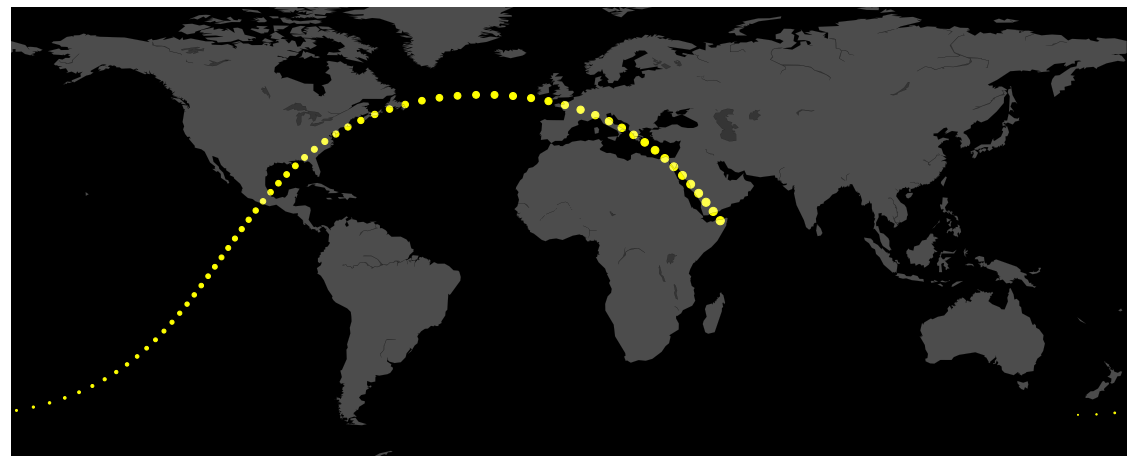

In [23]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(20, 14))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='black', linewidth=0)
m.fillcontinents(color='white', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="black")

 
 
m.scatter(iss_flight_record['longitude'], 
          iss_flight_record['latitude'], 
          s=iss_flight_record['index'] , alpha=1.0,color='blue')


# Model the ISS Data

In [64]:
# each dot represents one minute - can we predict where it will be in the next 10 minutes?
tmp_df = iss_flight_record.tail(10)
tmp_df

,timestamp,latitude,longitude,date,index
0,1642526528,49.1112,44.2557,2022-01-18 17:22:08,1
1,1642526588,50.2043,49.7751,2022-01-18 17:23:08,2
2,1642526648,50.9990,55.5271,2022-01-18 17:24:08,3
3,1642526708,51.4739,61.3955,2022-01-18 17:25:08,4
4,1642526768,51.6247,67.3980,2022-01-18 17:26:08,5
5,1642526828,51.4423,73.3958,2022-01-18 17:27:08,6


In [65]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(
    x = tmp_df['longitude'],
    y = tmp_df['latitude'])

print('intercept: ', intercept)
print('slope: ', slope)

intercept:  46.14530929062134
slope:  0.07955584083191557


In [66]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope * 20 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: 48.0


In [67]:
# predict longitude 1 periods out
predicted_latitude = np.ceil(slope * 20 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: 48.0


In [68]:
# approximate 10 periods out 
predicted_latitude = np.ceil(slope * 60 + intercept)

print('Next predicted point:', predicted_latitude)

Next predicted point: 51.0


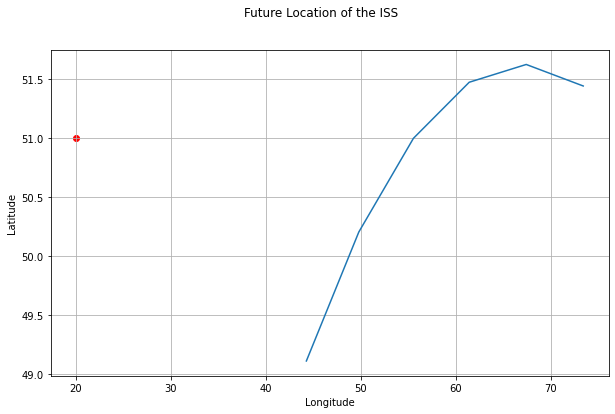

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')

# Polynomial Regression

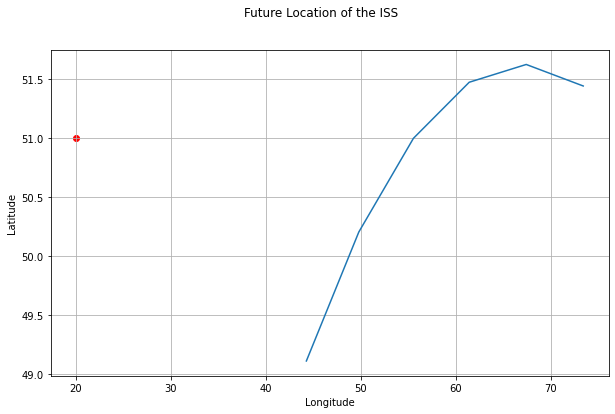

In [70]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')

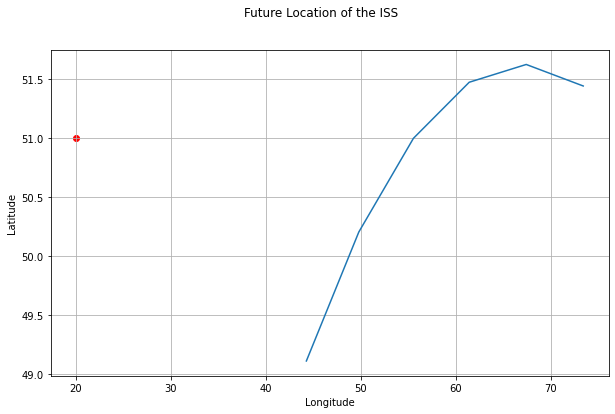

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(tmp_df['longitude'],
    tmp_df['latitude'])

plt.suptitle('Future Location of the ISS')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()

plt.scatter([20], [predicted_latitude], color='red')